In [86]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib
import networkx as nx
from ImageCompressionSVD import ImageCompressionSVD
from SpectralCommunityDetection import SpectralCommunityDetection


In [87]:

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

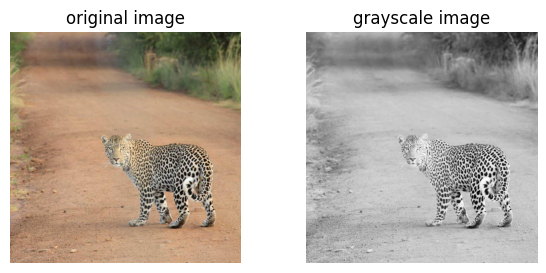

In [88]:
image_url = "https://fastly.picsum.photos/id/219/1200/1200.jpg?hmac=hVx7D_aNUjlmtlaYidaqbaIOhwFFYwkL1VrMXiFFFCY"
img = read_image(image_url)

img_grey = ImageCompressionSVD.to_grayscale_image(img)
ImageCompressionSVD.compare_images(img, img_grey, "original image", "grayscale image")


relative size for k = 2: 0.0033347222222222224


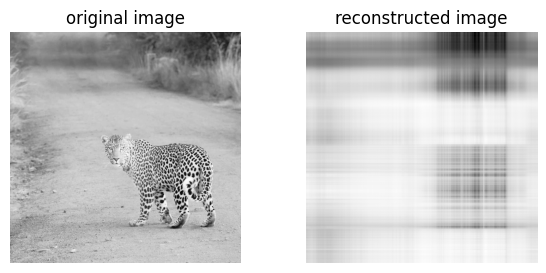

In [89]:
# ImageCompressionSVD.svd_reconstruct(img, 10)
# ImageCompressionSVD.svd_reconstruct(img, 50)
# ImageCompressionSVD.svd_reconstruct(img, 100)
# ImageCompressionSVD.svd_reconstruct(img, 200)
# k_values = [10, 50, 100, 200]
k_values = [2]
ImageCompressionSVD.svd_experiment(img, k_values)

threshold: 0.3333333333333333
k = 199


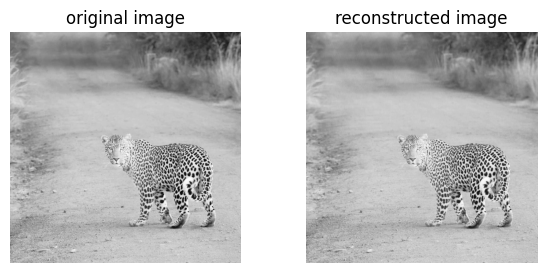

In [90]:
# I want to make the image 3x smaller
compression_factor = 3
k = ImageCompressionSVD.find_k_for_compression_threshold(img, compression_factor)
print(f"{k = }",)

ImageCompressionSVD.svd_reconstruct(img, k)



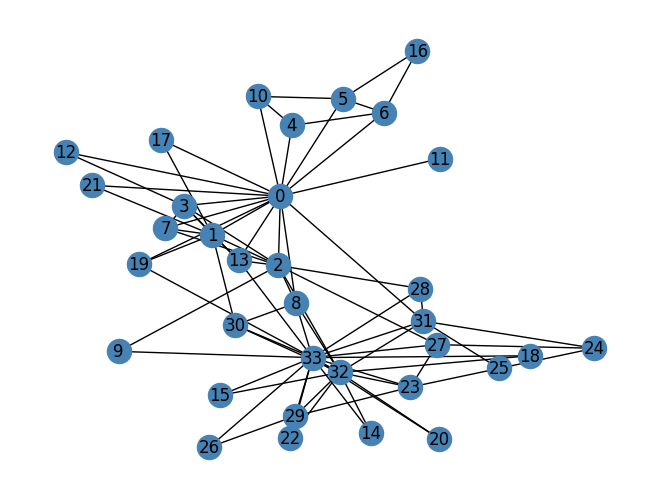

In [91]:
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

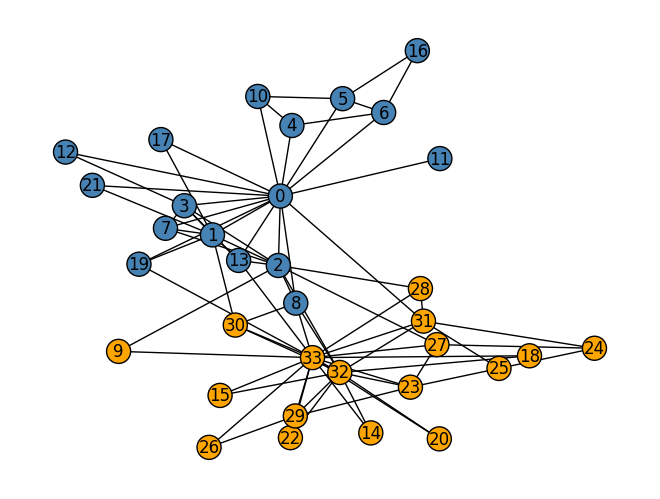

In [92]:
clubs = nx.get_node_attributes(G, "club")
nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

In [93]:
communities = SpectralCommunityDetection.spectral_clustering(G, 2)
nx.draw(G, layout,
        with_labels=True,
        node_color = ["orange" if i in communities[0] else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        )


68


c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


TypeError: argument of type 'numpy.int32' is not iterable

We make the classic mistake of mislabeling individual 8.

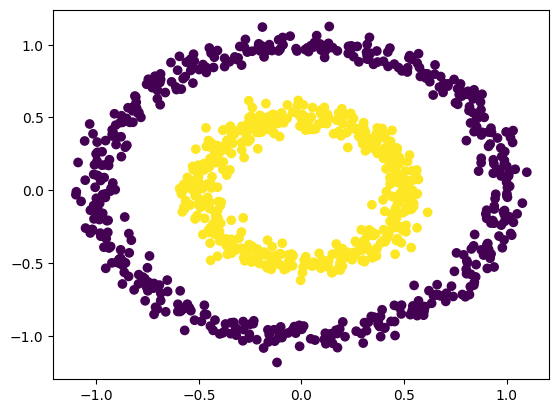

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y)

c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


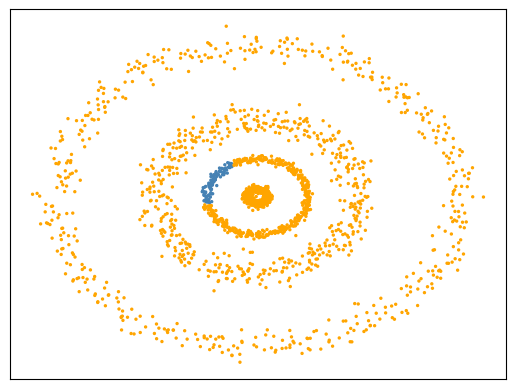

In [97]:
GC = SpectralCommunityDetection.get_nearest_neighbor_graph(X, 5)
communities = SpectralCommunityDetection.spectral_clustering(GC, 2).tolist()

colors = ["orange", "steelblue"]

nx.draw_networkx_nodes(
    GC,
    pos = {i: X[i] for i in range(len(X))},
    node_color = [colors[i] for i in communities],
    node_size = 2
)

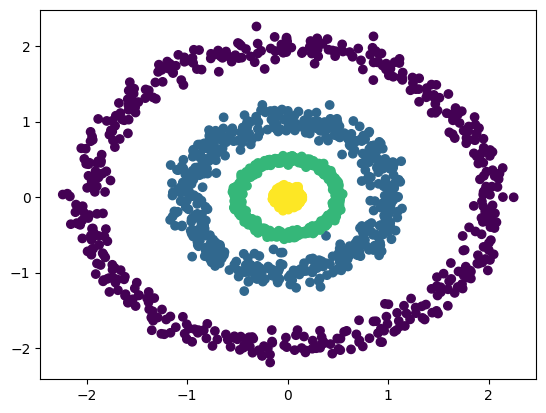

In [ ]:
# 4 rings

X_large, y_large = make_circles(n_samples=1000, noise=0.05, factor=0.5)
X_small, y_small = make_circles(n_samples=1000, noise=0.05, factor=0.2)

X_large[:, 0] *= 2
X_large[:, 1] *= 2
X_small[:, 0] *= 0.5
X_small[:, 1] *= 0.5
y_small += 2

X = np.concatenate([X_large, X_small])
y = np.concatenate([y_large, y_small])

plt.scatter(X[:, 0], X[:, 1], c=y)

c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


accuracy = 0.0005


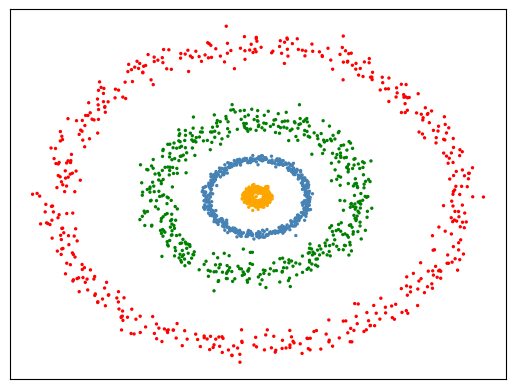

In [103]:
GMC = SpectralCommunityDetection.get_nearest_neighbor_graph(X, 12)
communities = SpectralCommunityDetection.spectral_clustering(GMC, 4).tolist()


colors = ["orange", "steelblue", "green", "red"]

nx.draw_networkx_nodes(
    GMC,
    pos = {i: X[i] for i in range(len(X))},
    node_color = [colors[i] for i in communities],
    node_size = 2
)
